## Анализ данных

В качестве получения начальных предсказаний будем прогнозировать максимум и минимум за следующие 24 периода в зависимости от исторических данных. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('D:/Work/Data/ML_RIU2.csv', delimiter=';', header = 0)

In [3]:
df['Trade_Time']= pd.to_datetime(df['Trade_Time'])
#df = df.set_index('Trade_Time')

Что имеем: график реальных данных. 
Мы не знаем, по какому закону он построен, и пытаемся его узнать - то есть подобрать функцию 𝑦=𝑓(𝑥).

Работа Data Scientist - подобрать наиболее близкую функцию с помощью инструментов машинного обучения.

    y - target (таргет, целевая переменная) - величина, которую хотим прогнозировать. В данном случае это цена из колонки df['close'].
    X - features (признаки) - факторы, по которым хотим прогнозировать что-то. В нашем случае это ____________. 
    Можно выбрать / сконструировать другие признаки. Это входит в работу Data Scientist.

Чтобы обучить модель (любую), нужно пройти 2 предварительные стадии:

    Сгенерировать новые признаки (если нужно)
    Разделить данные на 2 выборки (2 набора записей) - для обучения модели и для тестирования

In [4]:
#plt.plot(df['Trade_Time'], df['close'])

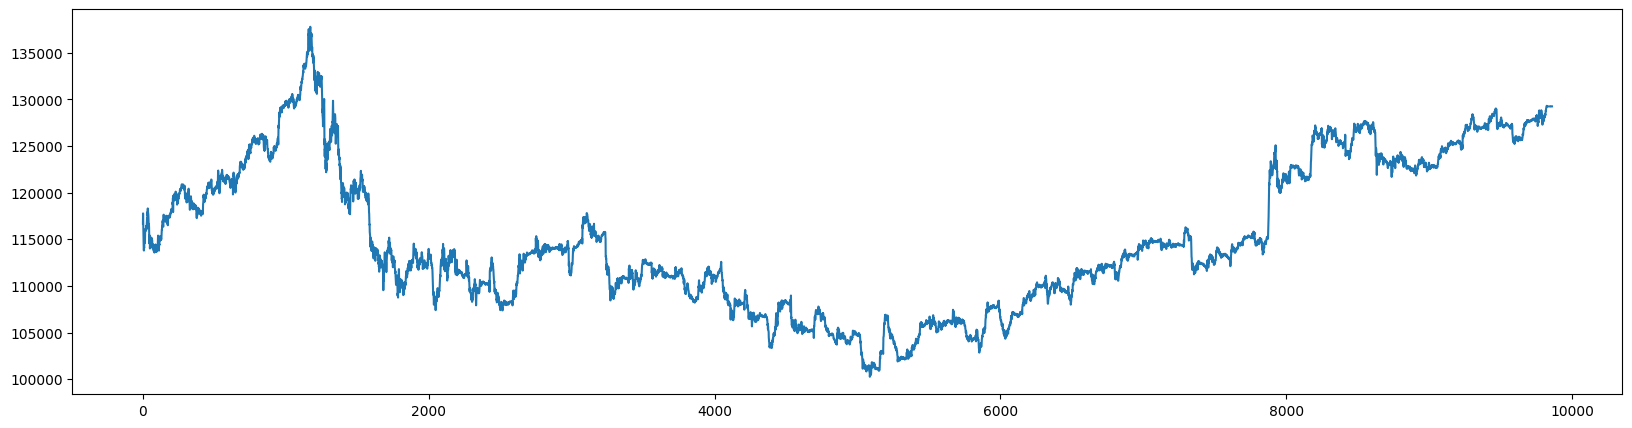

In [5]:
plt.figure(figsize=(20, 5))
plt.plot(df['close'])

In [6]:
# Нам доступно 100% данных или есть пропуски? Удаляем некорректные данные
condition_skipped = df['close'].isna()
df[condition_skipped]

,Trade_Time,open,high,low,close,VOL,VB,VS,Delta_Vol,OI,...,yurl_l,dyl,yurl_s,dys,yurl_l_num,yurl_s_num,fiz_l,fyl,fiz_s,fys


In [7]:
condition_good = df['close'].notna()
df[condition_good]

,Trade_Time,open,high,low,close,VOL,VB,VS,Delta_Vol,OI,...,yurl_l,dyl,yurl_s,dys,yurl_l_num,yurl_s_num,fiz_l,fyl,fiz_s,fys
0,2022-06-14 10:00:00,116800.0,117180.0,116000.0,116690.0,317,130,187,-57,106070.0,...,29012.0,0.0,5574.0,0.0,48.0,31.0,24023.0,0.0,47461.0,0.0
1,2022-06-14 10:05:00,116410.0,117980.0,116130.0,117770.0,141,100,41,59,105655.0,...,28598.0,-414.0,5625.0,51.0,46.0,33.0,24231.0,208.0,47201.0,-260.0
2,2022-06-14 10:10:00,117830.0,117980.0,116610.0,116770.0,291,106,185,-79,105829.0,...,28583.0,-15.0,5678.0,53.0,44.0,34.0,24331.0,100.0,47237.0,36.0
3,2022-06-14 10:15:00,116700.0,116700.0,115160.0,115270.0,261,58,203,-145,106286.0,...,28608.0,25.0,5831.0,153.0,45.0,37.0,24536.0,205.0,47311.0,74.0
4,2022-06-14 10:20:00,115210.0,115210.0,114500.0,114850.0,242,99,143,-44,104648.0,...,28715.0,107.0,5459.0,-372.0,46.0,33.0,23609.0,-927.0,46865.0,-446.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9855,2022-09-15 18:25:00,129230.0,129240.0,129230.0,129240.0,53,29,24,5,120540.0,...,34904.0,287.0,9062.0,99.0,38.0,61.0,25366.0,-417.0,51208.0,-229.0
9856,2022-09-15 18:30:00,129240.0,129240.0,129230.0,129240.0,41,38,3,35,120148.0,...,34839.0,-65.0,9023.0,-39.0,38.0,62.0,25235.0,-131.0,51051.0,-157.0
9857,2022-09-15 18:35:00,129240.0,129240.0,129230.0,129240.0,37,25,12,13,119130.0,...,34745.0,-94.0,9072.0,49.0,36.0,59.0,24820.0,-415.0,50493.0,-558.0
9858,2022-09-15 18:40:00,129240.0,129250.0,129230.0,129250.0,119,113,6,107,119178.0,...,34751.0,6.0,9258.0,186.0,37.0,60.0,24838.0,18.0,50331.0,-162.0


## Модель 1: Линейная регрессия
Истинная модель - какая-то функция $y = f(x)$.

Пытаемся подобрать функцию z(x), которая просто вычисляется и максимально похожа на f(x).

Самая простая модель - линейная регрессия, которая подбирает коэффициенты
$z = ax+b$



* Коэффициенты a и b - **параметры** модели. Они подбираются автоматически в процессе обучения

## 1 подготовительный шаг: сгенерируем новый признак

Будем предсказывать максимум или минимум за 24 последних бара

In [8]:
# добавляем две колонки на 6 и 7 места в таблице
df.insert(5, '24high', 0)
df.insert(6, '24min', 0)

In [9]:
# максимум за последние 24 бара ( 2 часа)
df['24high'] = pd.Series(df['high']).rolling(5).max()

In [10]:
# минимум за последние 24 бара ( 2 часа)
df['24min'] = pd.Series(df['low']).rolling(5).min()

In [11]:
# заполняем NaN последующими значениями ( не предыдущими!)
df = df.bfill(axis=0)

In [12]:
# находим разницу между high и low  - это у нас размер свечи, будем по нему сравнивать предсказания
df['candle'] = df['high'] - df['low']

In [13]:
# статистика по столбцу candle
df['candle'].describe()

count    9860.000000
mean      329.774848
std       278.577724
min         0.000000
25%       150.000000
50%       270.000000
75%       420.000000
max      4890.000000
Name: candle, dtype: float64

In [41]:
df

,Trade_Time,open,high,low,close,24high,24min,VOL,VB,VS,...,dyl,yurl_s,dys,yurl_l_num,yurl_s_num,fiz_l,fyl,fiz_s,fys,candle
0,2022-06-14 10:00:00,116800.0,117180.0,116000.0,116690.0,117980.0,114500.0,317,130,187,...,0.0,5574.0,0.0,48.0,31.0,24023.0,0.0,47461.0,0.0,1180.0
1,2022-06-14 10:05:00,116410.0,117980.0,116130.0,117770.0,117980.0,114500.0,141,100,41,...,-414.0,5625.0,51.0,46.0,33.0,24231.0,208.0,47201.0,-260.0,1850.0
2,2022-06-14 10:10:00,117830.0,117980.0,116610.0,116770.0,117980.0,114500.0,291,106,185,...,-15.0,5678.0,53.0,44.0,34.0,24331.0,100.0,47237.0,36.0,1370.0
3,2022-06-14 10:15:00,116700.0,116700.0,115160.0,115270.0,117980.0,114500.0,261,58,203,...,25.0,5831.0,153.0,45.0,37.0,24536.0,205.0,47311.0,74.0,1540.0
4,2022-06-14 10:20:00,115210.0,115210.0,114500.0,114850.0,117980.0,114500.0,242,99,143,...,107.0,5459.0,-372.0,46.0,33.0,23609.0,-927.0,46865.0,-446.0,710.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9855,2022-09-15 18:25:00,129230.0,129240.0,129230.0,129240.0,129250.0,129230.0,53,29,24,...,287.0,9062.0,99.0,38.0,61.0,25366.0,-417.0,51208.0,-229.0,10.0
9856,2022-09-15 18:30:00,129240.0,129240.0,129230.0,129240.0,129250.0,129230.0,41,38,3,...,-65.0,9023.0,-39.0,38.0,62.0,25235.0,-131.0,51051.0,-157.0,10.0
9857,2022-09-15 18:35:00,129240.0,129240.0,129230.0,129240.0,129250.0,129230.0,37,25,12,...,-94.0,9072.0,49.0,36.0,59.0,24820.0,-415.0,50493.0,-558.0,10.0
9858,2022-09-15 18:40:00,129240.0,129250.0,129230.0,129250.0,129250.0,129230.0,119,113,6,...,6.0,9258.0,186.0,37.0,60.0,24838.0,18.0,50331.0,-162.0,20.0


## 2 подготовительный шаг - Разделение данных на train-test

Разбиваем данные на 2 выборки: на тренировочную (обучающую, train) и тестовую (валидационную, test, val)

In [14]:
# data_train - обучающая выборка
# data_test - тестовая выборка

In [15]:
data_train = df[df['Trade_Time'] < '2022-09-01']
data_test = df[df['Trade_Time'] >= '2022-09-01']

In [16]:
#plt.figure(figsize=(20, 5))
#plt.plot(data_train['Trade_Time'], data_train['close'], label='Данные для обучения')
#plt.plot(data_test['Trade_Time'], data_test['close'], label='Данные для тестирования')
#plt.legend()

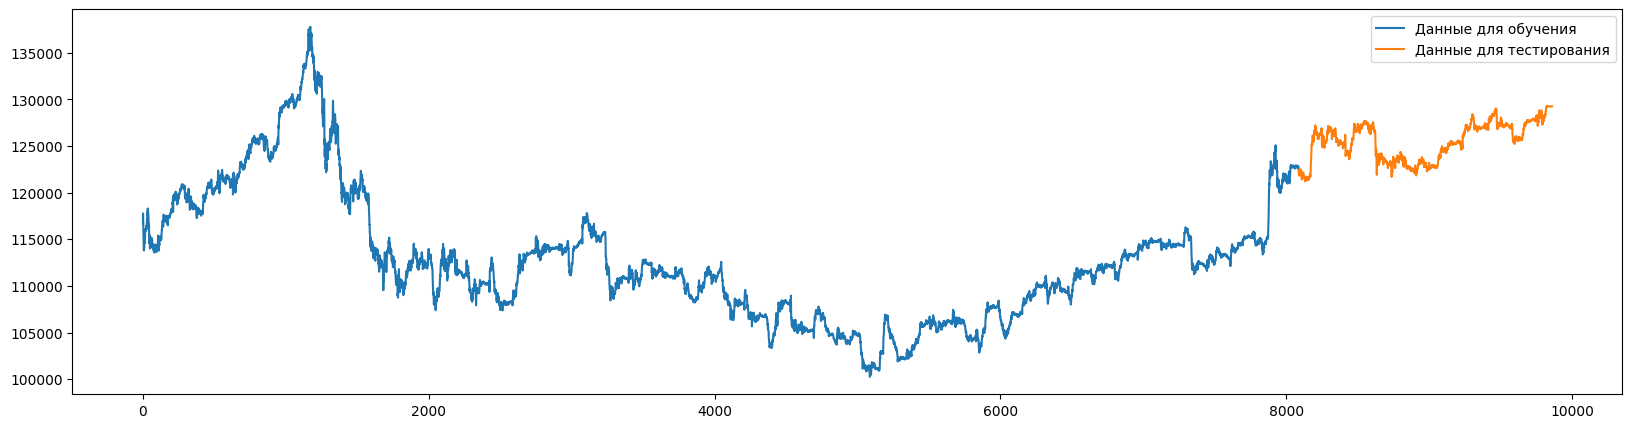

In [17]:
plt.figure(figsize=(20, 5))
plt.plot(data_train['close'], label='Данные для обучения')
plt.plot(data_test['close'], label='Данные для тестирования')
plt.legend()

In [18]:
# Для того, чтобы обучить модель, нужно еще раз разделить выборку 
# на фичи (признаки, features, X) и таргет (целевую переменную, которую прогнозируем, target, y)
# 2 датасета train-test х 2 features-target - создаем 4 переменных: 
# X_train, y_train, X_test, y_test

X_train = pd.DataFrame()
X_train[['open','high','low','close','VOL','VB','VS','Delta_Vol','OI','doi','yurl_l','dyl','yurl_s',
         'dys']] = data_train[['open','high','low','close','VOL','VB','VS','Delta_Vol','OI','doi',
                               'yurl_l','dyl','yurl_s','dys']]

X_test = pd.DataFrame()
X_test[['open','high','low','close','VOL','VB','VS','Delta_Vol','OI','doi','yurl_l','dyl','yurl_s',
        'dys']] = data_test[['open','high','low','close','VOL','VB','VS','Delta_Vol','OI','doi',
                             'yurl_l','dyl','yurl_s','dys']]


y_train = data_train['24high']
y_test = data_test['24high']

In [19]:
X_train

,open,high,low,close,VOL,VB,VS,Delta_Vol,OI,doi,yurl_l,dyl,yurl_s,dys
0,116800.0,117180.0,116000.0,116690.0,317,130,187,-57,106070.0,0.0,29012.0,0.0,5574.0,0.0
1,116410.0,117980.0,116130.0,117770.0,141,100,41,59,105655.0,-415.0,28598.0,-414.0,5625.0,51.0
2,117830.0,117980.0,116610.0,116770.0,291,106,185,-79,105829.0,174.0,28583.0,-15.0,5678.0,53.0
3,116700.0,116700.0,115160.0,115270.0,261,58,203,-145,106286.0,457.0,28608.0,25.0,5831.0,153.0
4,115210.0,115210.0,114500.0,114850.0,242,99,143,-44,104648.0,-1638.0,28715.0,107.0,5459.0,-372.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8082,122770.0,122840.0,122720.0,122840.0,32,21,11,10,156836.0,4.0,52657.0,-6.0,6069.0,0.0
8083,122770.0,122770.0,122710.0,122720.0,45,9,36,-27,156814.0,-22.0,52666.0,9.0,6064.0,-5.0
8084,122750.0,122750.0,122710.0,122720.0,18,7,11,-4,156786.0,-28.0,52668.0,2.0,6063.0,-1.0
8085,122720.0,122750.0,122640.0,122750.0,106,49,57,-8,156818.0,32.0,52655.0,-13.0,6069.0,6.0


## 1 модель: Линейная регрессия (Linear Regression)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
# Создаем пустой объект со случайными a и b, которые пока не описывают наши данные

model = LinearRegression()

In [22]:
# Обучаем модель: подгоняем модель по данным X_train и говорим "правильные ответы" - y_train
model.fit(X_train, y_train)

LinearRegression()

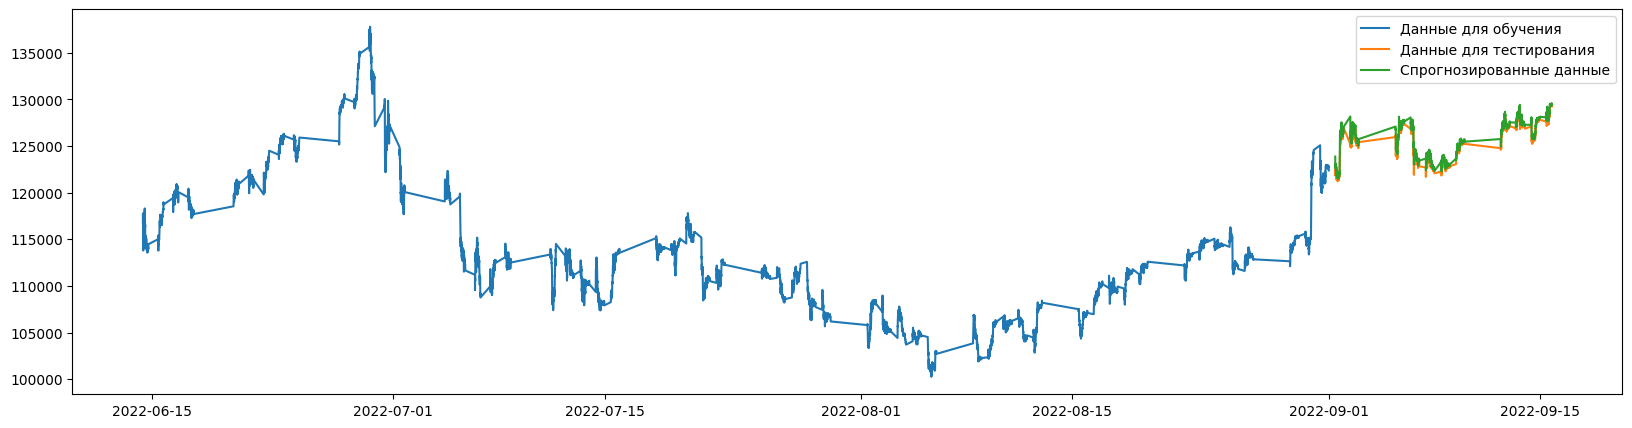

In [23]:
# Посмотрим, какую мат. модель построила регрессия по данным

# прогноз на данных, которые модель еще не видела
pred_test = model.predict(X_test)

# Распечатаем графики
plt.figure(figsize=(20, 5))
plt.plot(data_train['Trade_Time'], data_train['close'], label='Данные для обучения')
plt.plot(data_test['Trade_Time'], data_test['close'], label='Данные для тестирования')
plt.plot(data_test['Trade_Time'], pred_test, label='Спрогнозированные данные')
plt.legend()

In [24]:
# Проверяем качество численно

# mean_absolute_error - средняя сумма отклонений (меньше -> лучше)

from sklearn.metrics import mean_absolute_error

print('Средняя ошибка на тестовой выборке =', mean_absolute_error(y_test, pred_test))

Средняя ошибка на тестовой выборке = 140.41320728543428


In [25]:
# Собираем все шаги воедино, делаем предсказания для 24high

In [26]:
# Заново переразбиваем датасет на train-test, чтобы изменения применились
data_train = df[df['Trade_Time'] < '2022-09-01']
data_test = df[df['Trade_Time'] >= '2022-09-01']

In [27]:
# Из train-test формируем X_train, X_test.

X_train = pd.DataFrame()
X_train[['open','high','low','close','VOL','VB','VS','Delta_Vol','OI','doi','yurl_l','dyl','yurl_s',
         'dys']] = data_train[['open','high','low','close','VOL','VB','VS','Delta_Vol','OI','doi',
                               'yurl_l','dyl','yurl_s','dys']]
  
X_test = pd.DataFrame()
X_test[['open','high','low','close','VOL','VB','VS','Delta_Vol','OI','doi','yurl_l','dyl','yurl_s',
        'dys']] = data_test[['open','high','low','close','VOL','VB','VS','Delta_Vol','OI','doi',
                             'yurl_l','dyl','yurl_s','dys']]


y_train = data_train['24high']
y_test = data_test['24high']

In [28]:
# Создаем модель и обучаем ее
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
# Делаем прогноз
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

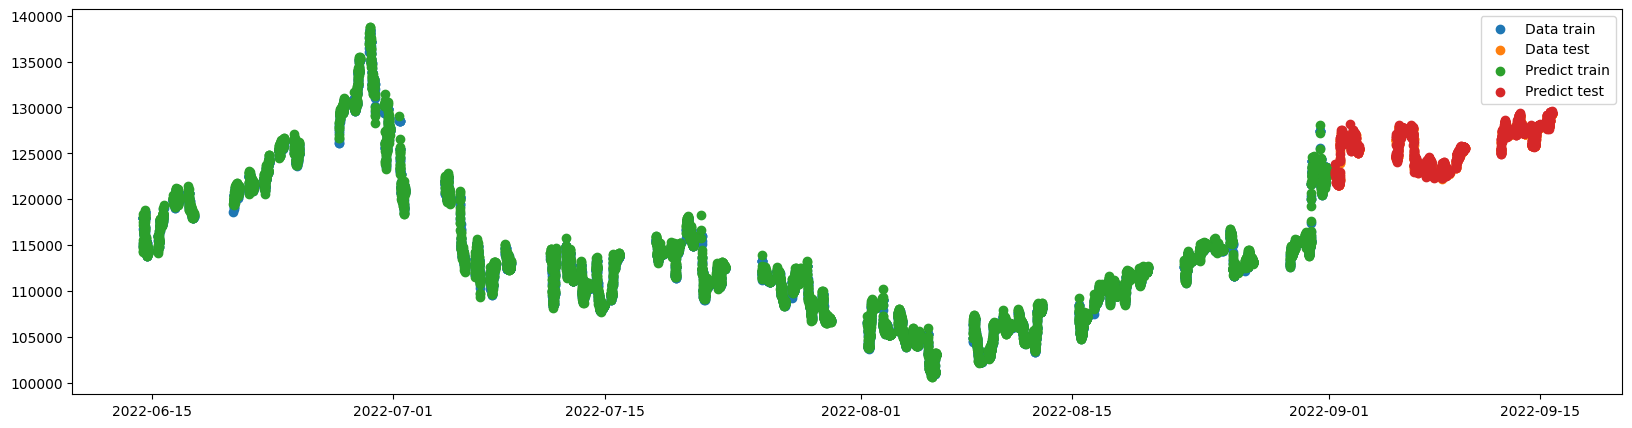

In [30]:
# Печатаем графики
plt.figure(figsize=(20, 5))
plt.scatter(data_train['Trade_Time'], y_train, label='Data train')
plt.scatter(data_test['Trade_Time'], y_test, label='Data test')
plt.scatter(data_train['Trade_Time'], pred_train, label='Predict train')
plt.scatter(data_test['Trade_Time'], pred_test, label='Predict test')
plt.legend()

In [31]:
# Смотрим на величину ошибки
print('Средняя ошибка на обучающей выборке =', mean_absolute_error(y_train, pred_train))
print('Средняя ошибка на тестовой выборке =', mean_absolute_error(y_test, pred_test))

Средняя ошибка на обучающей выборке = 193.1658194753092
Средняя ошибка на тестовой выборке = 140.41320728543428


In [32]:
# Делаем предсказания для 24min
# Везде добавим _m, что бы не смешивать результаты

In [44]:
# Заново переразбиваем датасет на train-test, чтобы изменения применились
data_train_m = df[df['Trade_Time'] < '2022-09-01']
data_test_m = df[df['Trade_Time'] >= '2022-09-01']

In [45]:
# Из train-test формируем X_train, X_test.

X_train_m = pd.DataFrame()
X_train_m[['open','high','low','close','VOL','VB','VS','Delta_Vol','OI','doi','yurl_l','dyl','yurl_s',
         'dys']] = data_train_m[['open','high','low','close','VOL','VB','VS','Delta_Vol','OI','doi',
                               'yurl_l','dyl','yurl_s','dys']]
  
X_test_m = pd.DataFrame()
X_test_m[['open','high','low','close','VOL','VB','VS','Delta_Vol','OI','doi','yurl_l','dyl','yurl_s',
        'dys']] = data_test_m[['open','high','low','close','VOL','VB','VS','Delta_Vol','OI','doi',
                             'yurl_l','dyl','yurl_s','dys']]


y_train_m = data_train_m['24min']
y_test_m = data_test_m['24min']

In [46]:
# Создаем модель и обучаем ее
model_m = LinearRegression()
model_m.fit(X_train_m, y_train_m)

LinearRegression()

In [47]:
# Делаем прогноз
pred_train_m = model_m.predict(X_train_m)
pred_test_m = model_m.predict(X_test_m)

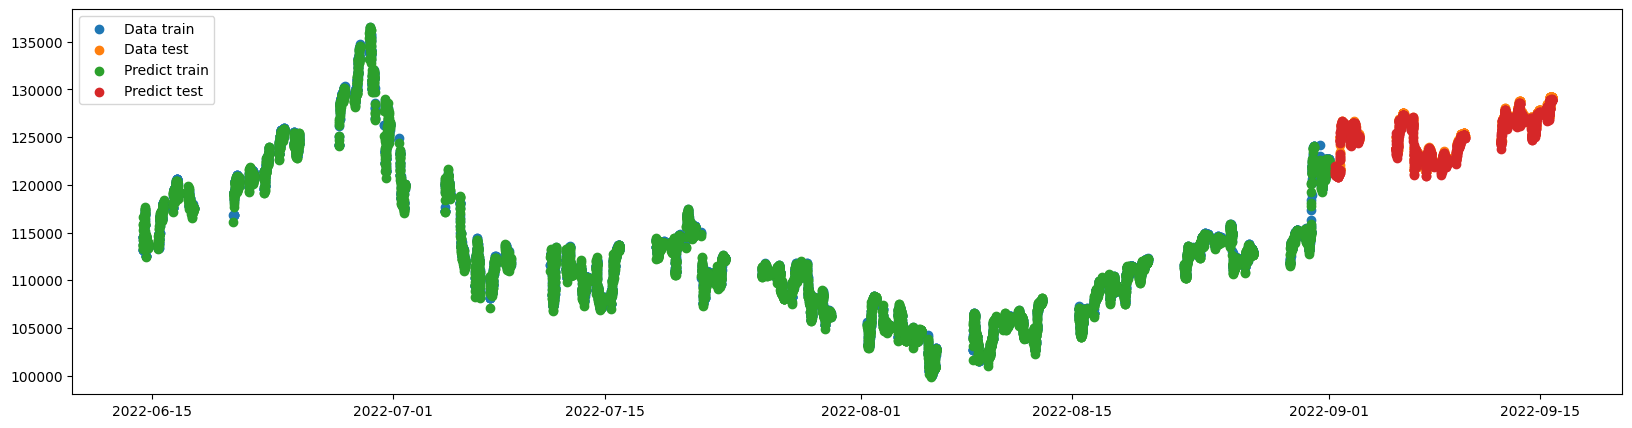

In [48]:
# Печатаем графики
plt.figure(figsize=(20, 5))
plt.scatter(data_train_m['Trade_Time'], y_train_m, label='Data train')
plt.scatter(data_test_m['Trade_Time'], y_test_m, label='Data test')
plt.scatter(data_train_m['Trade_Time'], pred_train_m, label='Predict train')
plt.scatter(data_test_m['Trade_Time'], pred_test_m, label='Predict test')
plt.legend()

In [49]:
# Смотрим на величину ошибки
print('Средняя ошибка на обучающей выборке =', mean_absolute_error(y_train_m, pred_train_m))
print('Средняя ошибка на тестовой выборке =', mean_absolute_error(y_test_m, pred_test_m))

Средняя ошибка на обучающей выборке = 204.41308646428527
Средняя ошибка на тестовой выборке = 209.22512054357182


### Вывод
Итак: порезультатам видно, что линейная регрессия дает предсказания с ошибкой, чуть лучше, чем средняя высота свечи.
Для последующих экспериментов возьмем эти результаты за условный "0", и будем сравнивать последующие эксперименты с этими данными, что бы видеть улучшения или ухудшения.